<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal Nº8
#### Gisela Farace

## Consigna

#### Estimación espectral. Método de Welch <br>
 
Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado. <br>

Para una señal $x(k)=a_{0}.sen(\Omega_{1}.k)+n(k)$<br>

siendo

$\Omega_{1}=\Omega_{0}+f_{r}.\frac{2\pi}{N}$

$\Omega_{0}=\frac{\pi}{2}$

y las variables aleatorias definidas por

$f_{r}\sim U(-\frac{1}{2},\frac{1}{2})$

$n\sim N(0,\sigma^2)$

Evalúe el siguiente estimador de $\Omega_{1}$

$\hat{\Omega_{1}}^{W}=arg_{f}max{\hat{P_{W}}}$

basado en el periodograma de Welch evaluado en 3). Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_{1}$

$\hat{\Omega_{1}}^{X}=arg_{f}max{\hat{P_{X}}}$

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del piso de ruido impuesto por $n(k)$.

## Código

#### Importación de librerias

In [1]:
# Importación de módulos para Jupyter

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.signal.windows as wind

# Para la tabla
from pandas import DataFrame
from IPython.display import HTML

#Presentación de los gŕaficos
mpl.rcParams['figure.figsize'] = (17,5)
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
plt.rcParams.update({'font.family':fig_font_family})

### 1) Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.

In [2]:
fs = 1000 # frecuencia de muestreo (Hz)

N = np.array([10, 50, 100, 250, 500, 1000, 5000], dtype=float)
R = 200 # realizaciones

sesgo = np.zeros(len(N))
varianza = np.zeros(len(N))
sigma = 2

for i in range(0,len(N)):
    K = int(N[i])
    frec = np.fft.fftfreq(K, d=1/fs)
    x = np.random.normal(0, np.sqrt(sigma), size=(K,R)) # ruido normalmente distribuido
    fft_x = np.fft.fft(x, K, axis = 0)
    Per_x = (1/K)*(np.abs(fft_x)**2)
    E_x = Per_x.mean() # media muestral  
    sesgo[i] = sigma - E_x
    varianza[i] = Per_x.var()

datos = [ 
          [sesgo[0], varianza[0]],
          [sesgo[1], varianza[1]], 
          [sesgo[2], varianza[2]],
          [sesgo[3], varianza[3]],
          [sesgo[4], varianza[4]], 
          [sesgo[5], varianza[5]], 
          [sesgo[6], varianza[6]],
        ]
df = DataFrame(datos, columns=['$s_P$', '$v_P$'], index=N)
HTML(df.to_html())

,$s_P$,$v_P$
10.0,0.035722,4.593651
50.0,-0.036694,4.334715
100.0,0.001835,4.170837
250.0,-0.022454,4.190485
500.0,-0.018508,4.066969
1000.0,-0.001779,3.999387
5000.0,-0.004086,4.012552


Se puede observar que la varianza no tiende a cero, por lo tanto el periodograma es inconcistente del espectro de potencia. El periodograma tiene una varianza constante igual a $\sigma^4$, en este caso es 4 por usar $\sigma^2=2$, lo cual no depende de N. Además, es asintóticamente insesgado debido a que a medida que N tiende a infinito, la ventana de Barlett converge a un impulso.


### 4) Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

Text(0.5, 0.98, 'Periodograma')

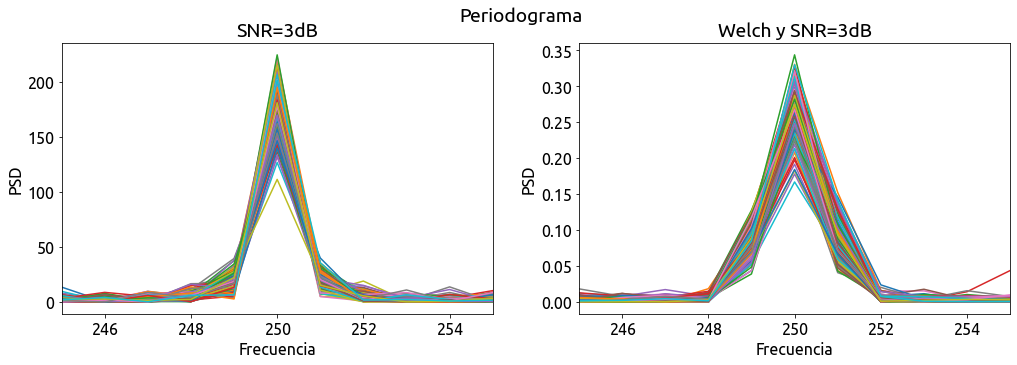

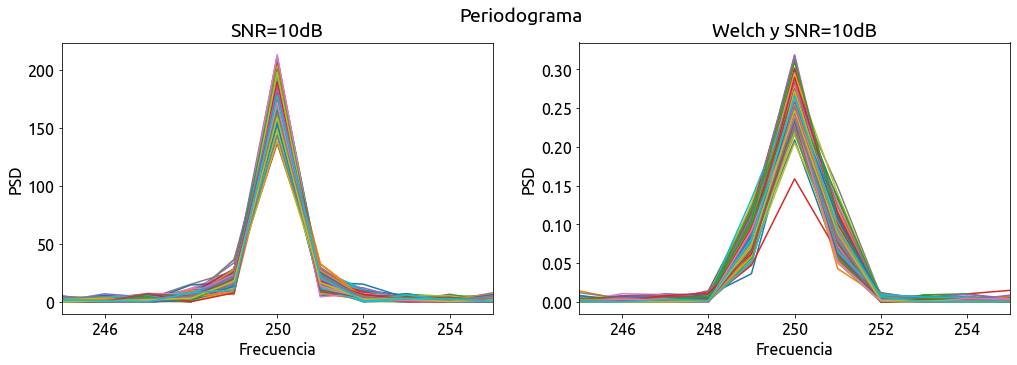

In [3]:
#Senoidal
#x(k)=a1⋅sen(Ω1⋅k)+n(k)
#Ω1=Ω0+(fr.2π)/N
#Ω0 = pi/2

N = 1000  # cantidad de muestras
fs = 1000 # frecuencia de muestreo (Hz)
R = 200 # realizaciones

SNR = np.array([3, 10], dtype=float) #En dB
# SNR = 10.log(Ps/Pn)
# Pn = Ps/[10^(SNR/10)]
# Ps = A^2/2 --> A = sqrt(Ps*2)
pot_sen = 1 #potencia unitaria
a1 = np.sqrt(pot_sen*2) # amplitud senoidal
pot_ruido = pot_sen/(10**(SNR/20))

ts = 1/fs # tiempo de muestreo (Hz)
df = fs/N # resolución espectral
tt = np.linspace(0, (N-1), N) * (1/fs)

frec = np.linspace(0, (N-1), N)*df

# Variables aleatorias
fr = np.random.uniform(low=-1/2, high=1/2, size=(N,R)) # distribución uniforme
n_3db = np.random.normal(0, np.sqrt(pot_ruido[0]), size=(N,R)) # ruido con SNR 3dB
n_10db = np.random.normal(0, np.sqrt(pot_ruido[1]), size=(N,R)) # ruido con SNR 10dB

ff = (np.pi/2 + fr*(2*np.pi/N))*(fs/(2*np.pi))
x = a1*np.sin(2*np.pi*ff*tt.reshape(N,1))

######### Para SNR=3dB #########
x1 = x + n_3db
#Periodograma
fft_x1 = np.fft.fft(x1, N, axis = 0)
Per_x1 = (1/N)*(np.abs(fft_x1)**2)
#Welch
fw_x1, Pw_x1 = sig.welch(x1, fs, nperseg=fs, axis=0)
fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(frec,Per_x1)
ax1.set_xlim(245,255)
ax1.set_title('SNR={:1.0f}dB'.format(SNR[0]))
ax1.set(xlabel='Frecuencia', ylabel='PSD')
ax2.plot(fw_x1,Pw_x1)
ax2.set_xlim(245,255)
ax2.set_title('Welch y SNR={:1.0f}dB'.format(SNR[0]))
ax2.set(xlabel='Frecuencia', ylabel='PSD')
fig1.suptitle('Periodograma')

######### Para SNR=10dB #########
x2 = x + n_10db
#Periodograma
fft_x2 = np.fft.fft(x2, N, axis = 0)
Per_x2 = (1/N)*(np.abs(fft_x2)**2)
#Welch
fw_x2, Pw_x2 = sig.welch(x2, fs, nperseg=fs, axis=0)
fig2, (ax3, ax4) = plt.subplots(1, 2)
ax3.plot(frec,Per_x2)
ax3.set_xlim(245,255)
ax3.set_title('SNR={:1.0f}dB'.format(SNR[1]))
ax3.set(xlabel='Frecuencia', ylabel='PSD')
ax4.plot(fw_x2,Pw_x2)
ax4.set_xlim(245,255)
ax4.set_title('Welch y SNR={:1.0f}dB'.format(SNR[1]))
ax4.set(xlabel='Frecuencia', ylabel='PSD')
fig2.suptitle('Periodograma')

[Text(0.5, 0, 'Frecuencia'), Text(0, 0.5, 'PSD')]

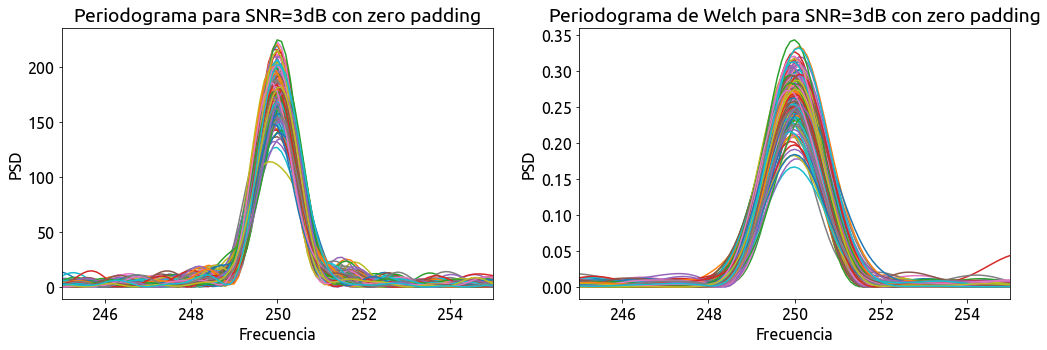

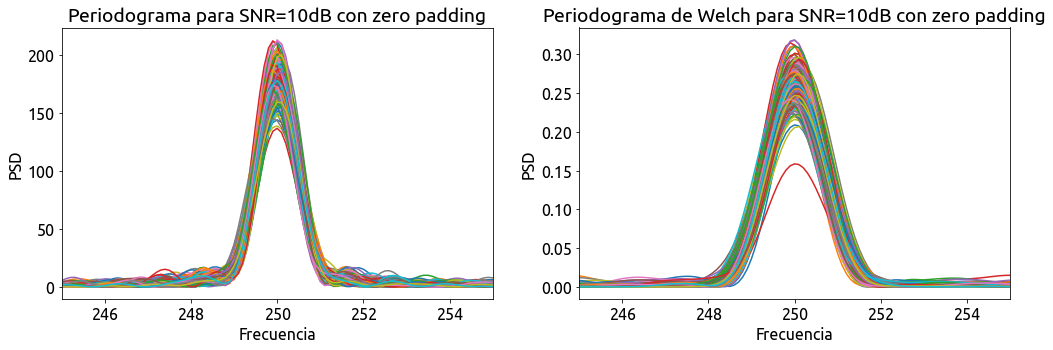

In [4]:
## CON PADDING ##
Npad = N*10

frec_p = np.linspace(0, (Npad-1), Npad)*fs/N

######### Para SNR=3dB #########
#Periodograma
fft_x1_p = np.fft.fft(x1, axis = 0, n=Npad)
Per_x1_p = (1/N)*(np.abs(fft_x1_p)**2)
#Welch
fw_x1_p, Pw_x1_p = sig.welch(x1, fs, nperseg=fs, nfft=Npad, axis=0)
fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(frec_p/(Npad/N),Per_x1_p)
ax1.set_xlim(245,255)
ax1.set_title('Periodograma para SNR={:1.0f}dB con zero padding'.format(SNR[0]))
ax1.set(xlabel='Frecuencia', ylabel='PSD')
ax2.plot(fw_x1_p,Pw_x1_p)
ax2.set_xlim(245,255)
ax2.set_title('Periodograma de Welch para SNR={:1.0f}dB con zero padding'.format(SNR[0]))
ax2.set(xlabel='Frecuencia', ylabel='PSD')

######### Para SNR=10dB #########
#Periodograma
fft_x2_p = np.fft.fft(x2, axis = 0, n=Npad)
Per_x2_p = (1/N)*(np.abs(fft_x2_p)**2)
#Welch
fw_x2_p, Pw_x2_p = sig.welch(x2, fs, nperseg=fs, nfft=Npad, axis=0)
fig2, (ax3, ax4) = plt.subplots(1, 2)
ax3.plot(frec_p/(Npad/N),Per_x2_p)
ax3.set_xlim(245,255)
ax3.set_title('Periodograma para SNR={:1.0f}dB con zero padding'.format(SNR[1]))
ax3.set(xlabel='Frecuencia', ylabel='PSD')
ax4.plot(fw_x2_p,Pw_x2_p)
ax4.set_xlim(245,255)
ax4.set_title('Periodograma de Welch para SNR={:1.0f}dB con zero padding'.format(SNR[1]))
ax4.set(xlabel='Frecuencia', ylabel='PSD')

Al utilizar la técnica de Zero Padding se puede observar como se suavizan los picos, esto se debe a que hay más puntos de medición.

### Busco el pico de cada realización y su frecuencia correspondiente

Text(0.5, 0.98, 'Periodograma con ventana de Blackman Tukey')

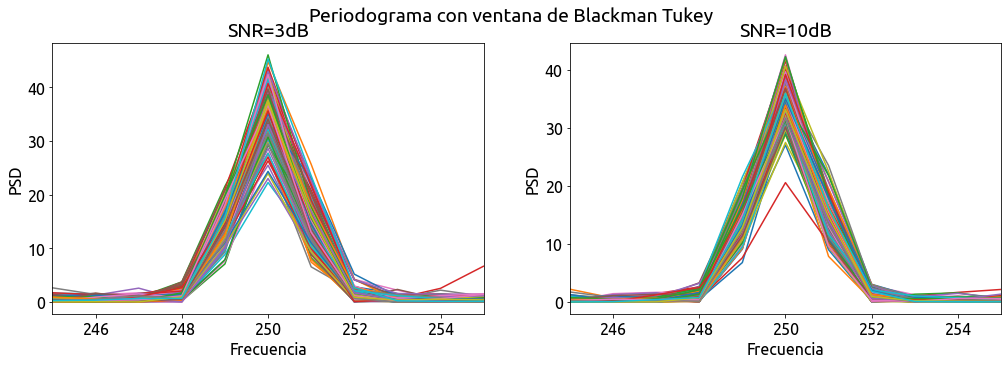

In [5]:
# Blackman-Tukey

black = np.array(wind.blackman(N)).reshape(N,1)
x1_bm = x1*black
x2_bm = x2*black

#Periodograma
fft_bm_x1 = np.fft.fft(x1_bm, N, axis = 0)
Per_bm_x1 = (1/N)*(np.abs(fft_bm_x1)**2)
fft_bm_x2 = np.fft.fft(x2_bm, N, axis = 0)
Per_bm_x2 = (1/N)*(np.abs(fft_bm_x2)**2)

fig1, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(frec,Per_bm_x1)
ax1.set_xlim(245,255)
ax1.set_title('SNR={:1.0f}dB'.format(SNR[0]))
ax1.set(xlabel='Frecuencia', ylabel='PSD')
ax2.plot(frec,Per_bm_x2)
ax2.set_xlim(245,255)
ax2.set_title('SNR={:1.0f}dB'.format(SNR[1]))
ax2.set(xlabel='Frecuencia', ylabel='PSD')
fig1.suptitle('Periodograma con ventana de Blackman Tukey')


In [6]:
# Busco el pico de cada realizacion, y la frecuencia correspondiente

# Periodograma para SNR=3dB
Per_x1_frec_pos = Per_x1[500:,:] #Me quedo con la parte positiva de frecuencia
frec_pos = frec[:500]
picos_x1 = np.zeros(len(Per_x1_frec_pos[0]))
frec_x1 = np.zeros(len(Per_x1_frec_pos[0]))

for i in range(0,len(Per_x1_frec_pos[0])):
    picos_x1[i]  = np.amax(Per_x1_frec_pos[:,i])
    frec_maximo = np.where(Per_x1_frec_pos[:,i]==picos_x1[i])[0][0]
    frec_x1[i] = frec_pos[frec_maximo]

# Welch para SNR=3dB
picos_w_x1 = np.zeros(len(Pw_x1[0]))
frec_w_x1 = np.zeros(len(Pw_x1[0]))

for i in range(0,len(Pw_x1[0])):
    picos_w_x1[i]  = np.amax(Pw_x1[:,i])
    frec_maximo = np.where(Pw_x1[:,i]==picos_w_x1[i])[0][0]
    frec_w_x1[i] = fw_x1[frec_maximo]

# Blackman Tukey para SNR=3dB
Per_bw_x1_mitad = Per_bm_x1[0:500,:] #Me quedo con la mitad
picos_bm_x1 = np.zeros(len(Per_bm_x1[0]))
frec_bm_x1 = np.zeros(len(Per_bm_x1[0]))

for i in range(0,len(Pw_x1[0])):
    picos_bm_x1[i]  = np.amax(Per_bw_x1_mitad[:,i])
    frec_maximo = np.where(Per_bw_x1_mitad[:,i]==picos_bm_x1[i])[0][0]
    frec_bm_x1[i] = frec_pos[frec_maximo]


# Periodograma para SNR=10dB
Per_x2_frec_pos = Per_x2[500:,:] #Me quedo con la parte positiva de frecuencia
picos_x2 = np.zeros(len(Per_x2_frec_pos[0]))
frec_x2 = np.zeros(len(Per_x2_frec_pos[0]))

for i in range(0,len(Per_x2_frec_pos[0])):
    picos_x2[i]  = np.amax(Per_x2_frec_pos[:,i])
    frec_maximo = np.where(Per_x2_frec_pos[:,i]==picos_x2[i])[0][0]
    frec_x2[i] = frec_pos[frec_maximo]

# Welch para SNR=10dB
picos_w_x2 = np.zeros(len(Pw_x2[0]))
frec_w_x2 = np.zeros(len(Pw_x2[0]))

for i in range(0,len(Pw_x2[0])):
    picos_w_x2[i]  = np.amax(Pw_x2[:,i])
    frec_maximo = np.where(Pw_x2[:,i]==picos_w_x2[i])[0][0]
    frec_w_x2[i] = fw_x2[frec_maximo]

# Blackman Tukey para SNR=10dB
Per_bw_x2_mitad = Per_bm_x2[0:500,:] #Me quedo con la mitad
picos_bm_x2 = np.zeros(len(Per_bm_x2[0]))
frec_bm_x2 = np.zeros(len(Per_bm_x2[0]))

for i in range(0,len(Pw_x1[0])):
    picos_bm_x2[i]  = np.amax(Per_bw_x2_mitad[:,i])
    frec_maximo = np.where(Per_bw_x2_mitad[:,i]==picos_bm_x2[i])[0][0]
    frec_bm_x2[i] = frec_pos[frec_maximo]


indice = ['$\hat{\Omega_{1}}^{X}$', 'frec $\hat{\Omega_{1}}^{X}$', '$\hat{\Omega_{1}}^{W}$', 'frec $\hat{\Omega_{1}}^{W}$','$\hat{\Omega_{1}}^{BT}$', 'frec $\hat{\Omega_{1}}^{BT}$']

datos = [ 
            [np.mean(picos_x1), np.mean(picos_x2)],
            [np.mean(frec_x1), np.mean(frec_x2)],
            [np.mean(picos_w_x1), np.mean(picos_w_x2)],
            [np.mean(frec_w_x1), np.mean(frec_w_x2)],
            [np.mean(picos_bm_x1), np.mean(picos_bm_x2)],
            [np.mean(frec_bm_x1), np.mean(frec_bm_x2)]
        ]
df = DataFrame(datos, columns=['3dB','10dB'], index=indice)
HTML(df.to_html())

,3dB,10dB
$\hat{\Omega_{1}}^{X}$,176.682903,175.960532
frec $\hat{\Omega_{1}}^{X}$,250.000000,250.000000
$\hat{\Omega_{1}}^{W}$,0.261043,0.258673
frec $\hat{\Omega_{1}}^{W}$,250.000000,250.000000
$\hat{\Omega_{1}}^{BT}$,35.086033,34.733327
frec $\hat{\Omega_{1}}^{BT}$,250.000000,250.000000
